# Simulation of Geometric Brownian Motion (GBM)

## 1. Introduction

This lecture presents a **numerical simulation** of **Geometric Brownian Motion (GBM)**, which is a fundamental model in financial mathematics. GBM is widely used for **modeling stock prices, asset returns, and option pricing**.

The function `simulate_gbm` simulates a stock price path under the **GBM model** using a discrete-time approximation.

---

## 2. Geometric Brownian Motion Model

The **stochastic differential equation (SDE)** for a stock price $ S_t $ following a GBM process is:

$$
dS_t = \mu S_t dt + \sigma S_t dW_t
$$

where:

- $ S_t $ is the stock price at time $ t $
- $ \mu $ is the **drift** (expected return)
- $ \sigma $ is the **volatility** (standard deviation of returns)
- $ W_t $ is a **Wiener process** (standard Brownian motion)

### Closed-Form Solution

Applying **Itô's Lemma**, the solution to this SDE is:

$$
S_t = S_0 e^{(\mu - \frac{1}{2} \sigma^2)t + \sigma W_t}
$$

where:

- $ S_0 $ is the initial stock price
- $ W_t $ is a **Wiener process** with $ W_0 = 0 $ and increments $ dW_t \sim \mathcal{N}(0, dt) $

---

## 3. Monte Carlo Discretization

In numerical simulations, we approximate the **continuous process** with discrete time steps. The discretized **Euler-Maruyama scheme** for GBM is:

$$
S_{t+dt} = S_t e^{(\mu - \frac{1}{2} \sigma^2) dt + \sigma \sqrt{dt} \cdot Z}
$$

where $ Z \sim \mathcal{N}(0,1) $ is a standard normal random variable.

---

## 4. Python Implementation

The function `simulate_gbm` generates a **single price path** using the GBM model.

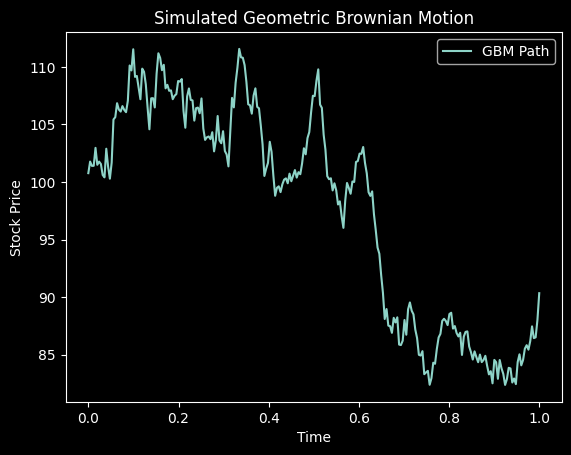

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def simulate_gbm(S0, mu, sigma, T, N):
    dt = T / N  # Time step size
    t = np.linspace(0, T, N)  # Time grid

    # Simulate Wiener process (Brownian motion)
    W = np.cumsum(np.random.randn(N) * np.sqrt(dt))

    # Simulate stock price using GBM formula
    S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)

    return t, S


# Parameters
S0 = 100  # Initial stock price
mu = 0.05  # Expected return (5% per year)
sigma = 0.2  # Volatility (20% per year)
T = 1  # Time horizon (1 year)
N = 252  # Number of time steps (daily resolution)

# Generate a GBM path
t, S = simulate_gbm(S0, mu, sigma, T, N)

# Plot the stock price path
plt.plot(t, S, label="GBM Path")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Simulated Geometric Brownian Motion")
plt.legend()
plt.show()

---

## 5. Step-by-Step Breakdown

### 5.1. Time Discretization

In [2]:
dt = T / N  # Time step size
t = np.linspace(0, T, N)  # Time grid

- The time horizon $ T $ is divided into $ N $ discrete steps.
- The array `t` stores evenly spaced time points from $ 0 $ to $ T $.

### 5.2. Simulating Brownian Motion

In [3]:
W = np.cumsum(np.random.randn(N) * np.sqrt(dt))

- A **Wiener process** $ W_t $ is approximated as a cumulative sum of normal increments:
  $$
  dW_t \sim \mathcal{N}(0, dt)
  $$
- This ensures that $ W_t $ has variance **proportional to time**.

### 5.3. Simulating the Stock Price

In [4]:
S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)

- This follows the exact GBM solution:
  $$
  S_t = S_0 e^{(\mu - \frac{1}{2} \sigma^2)t + \sigma W_t}
  $$
- The correction term $ -\frac{1}{2} \sigma^2 t $ ensures the expected price follows the deterministic drift.

### 5.4. Visualization

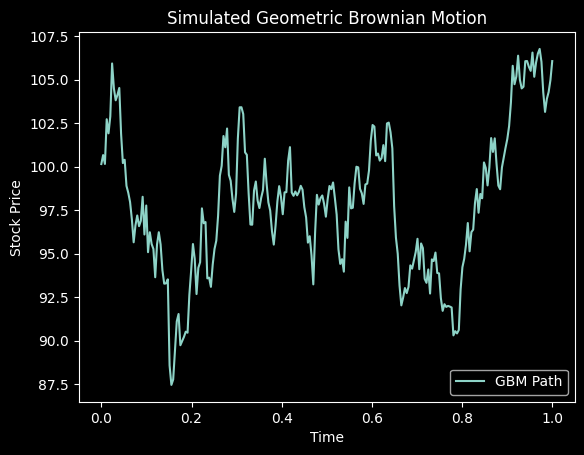

In [5]:
plt.plot(t, S, label="GBM Path")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Simulated Geometric Brownian Motion")
plt.legend()
plt.show()

- A **single stock price path** is plotted over time.
- This **illustrates price fluctuations** due to market randomness.

---

## 6. Interpretation of Results

- The simulated **stock price path** follows **random fluctuations** but shows an **upward trend** due to positive drift $ \mu $.
- Higher volatility $ \sigma $ results in **wider fluctuations**.
- The final stock price $ S_T $ is **random**, varying in each simulation.

---

## 7. Advantages and Limitations

### Advantages

- **Captures Market Uncertainty**: Incorporates both **expected growth** and **random shocks**.
- **Realistic for Financial Modeling**: Used in **option pricing** and **risk management**.
- **Simple and Efficient**: Uses **Euler discretization** with minimal computation.

### Limitations

- **Assumes Log-Normal Prices**: Real markets may exhibit **fat tails** or **jumps**.
- **Constant Volatility**: Market volatility is often **time-dependent** (e.g., GARCH models).
- **Ignores Market Microstructure**: Assumes **continuous trading** and **no liquidity constraints**.

---

## 8. Extensions and Applications

### 8.1. Multi-Path Monte Carlo Simulations

- Generate **multiple GBM paths** and analyze the distribution of final prices.

### 8.2. Option Pricing via Monte Carlo

- Compute **European call option prices** using:
  $$
  C = e^{-rT} \mathbb{E}[\max(S_T - K, 0)]
  $$

### 8.3. Stochastic Volatility Models

- Extend GBM to **Heston's model**, where volatility follows another SDE.

---

## 9. Conclusion

- **GBM is a fundamental model** in financial mathematics.
- It provides a **stochastic framework** for stock price evolution.
- **Monte Carlo simulations** enable numerical experiments for risk analysis.